In [9]:
# Import basic libraries and models
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
# Load the built-in Iris dataset
iris = load_iris()

# Convert to DataFrame for readability
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Target labels (0, 1, 2)

# Optional: View first few rows
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [4]:
# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

# Train Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [5]:
# Make predictions using both models
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)


In [6]:
# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:      ", accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.9333333333333333
Decision Tree Accuracy:       0.9777777777777777


In [7]:
# Classification report and confusion matrix
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))



Confusion Matrix (Logistic Regression):
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



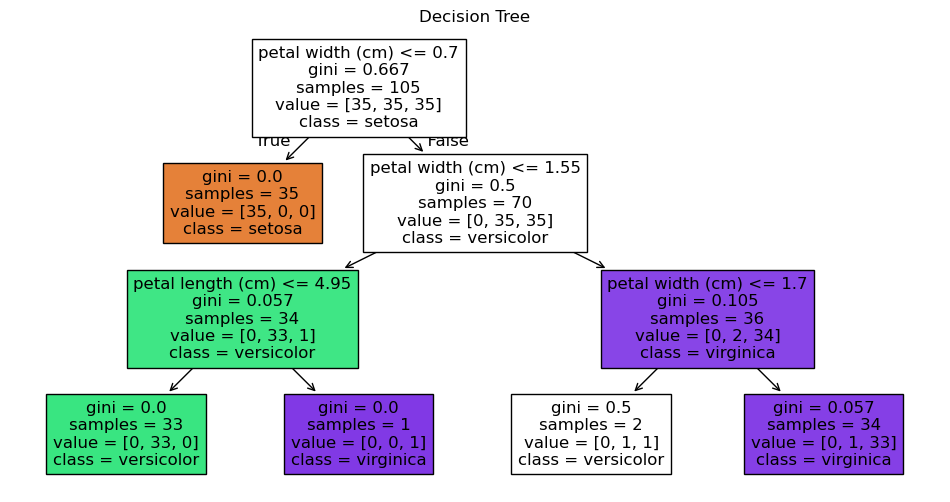

In [10]:


# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(model_dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()
